In [1]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

In [4]:
np.random.seed(0)
indices = np.random.permutation(len(iris_X))

[114  62  33 107   7 100  40  86  76  71 134  51  73  54  63  37  78  90
  45  16 121  66  24   8 126  22  44  97  93  26 137  84  27 127 132  59
  18  83  61  92 112   2 141  43  10  60 116 144 119 108  69 135  56  80
 123 133 106 146  50 147  85  30 101  94  64  89  91 125  48  13 111  95
  20  15  52   3 149  98   6  68 109  96  12 102 120 104 128  46  11 110
 124  41 148   1 113 139  42   4 129  17  38   5  53 143 105   0  34  28
  55  75  35  23  74  31 118  57 131  65  32 138  14 122  19  29 130  49
 136  99  82  79 115 145  72  77  25  81 140 142  39  58  88  70  87  36
  21   9 103  67 117  47]


In [7]:
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [8]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [2]:
from sklearn import datasets
from sklearn import linear_model
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
import numpy as np
# The mean square error
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)*2)
regr.score(diabetes_X_test, diabetes_y_test)

0.58507530226905713

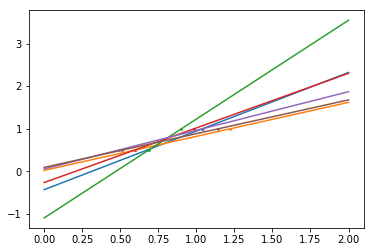

In [10]:
# shrinkage
X = np.c_[.5, 1].T
y = [.5, 1]
test = np.c_[0, 2].T
regr = linear_model.LinearRegression()
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
np.random.seed(0)
for _ in range(6):
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)

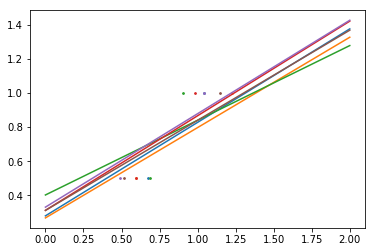

In [11]:
# A solution in high-dimensional statistical learning is to shrink the regression coefficients to zero
regr = linear_model.Ridge(alpha=.1)
plt.figure()
np.random.seed(0)
for _ in range(6):
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)